In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [27]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [7]:
df = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\train.csv')
df

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


# 결측치가 많은 컬럼 제거

In [8]:
df.isnull().sum()

drop_columns=['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20','U14','U6','U4','V100']

In [9]:
df = df.drop(columns=drop_columns)

In [10]:
df = df.rename(columns={'COMPONENT_ARBITRARY' : '샘플 오일 관련 부품','ANONYMOUS_1' : '무명 수치형 데이터 1','YEAR' : '오일 샘플 및 진단 해','SAMPLE_TRANSFER_DAY':'오일 샘플링 후 진단 기관으로 이동한 기간(일)','ANONYMOUS_2' : '무명 수치형 데이터 2','PQINDEX' : '입자 정량 지수','V40' : '점도 (40도)'})

In [11]:
df.head()

,ID,샘플 오일 관련 부품,무명 수치형 데이터 1,오일 샘플 및 진단 해,오일 샘플링 후 진단 기관으로 이동한 기간(일),무명 수치형 데이터 2,AG,AL,B,BA,...,입자 정량 지수,S,SB,SI,SN,TI,V,점도 (40도),ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0


In [30]:
columns_list = df.drop(columns=['ID','샘플 오일 관련 부품','무명 수치형 데이터 1', '오일 샘플 및 진단 해', '오일 샘플링 후 진단 기관으로 이동한 기간(일)','무명 수치형 데이터 2']).columns

In [31]:
len(columns_list)

31

In [32]:
columns_list

Index(['AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FE', 'H2O',
       'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB', '입자 정량 지수', 'S',
       'SB', 'SI', 'SN', 'TI', 'V', '점도 (40도)', 'ZN', 'Y_LABEL'],
      dtype='object')

In [23]:
# for i in range(len(columns_list)):
#     fig = plt.figure(figsize=(25, 15))
#     plt.subplot(6, 6, i+1)
#     sns.histplot(data=df, x=columns_list[i])
#     plt.show()

C:\Users\yoon9\anaconda3\envs\Sejong_project\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\yoon9\anaconda3\envs\Sejong_project\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


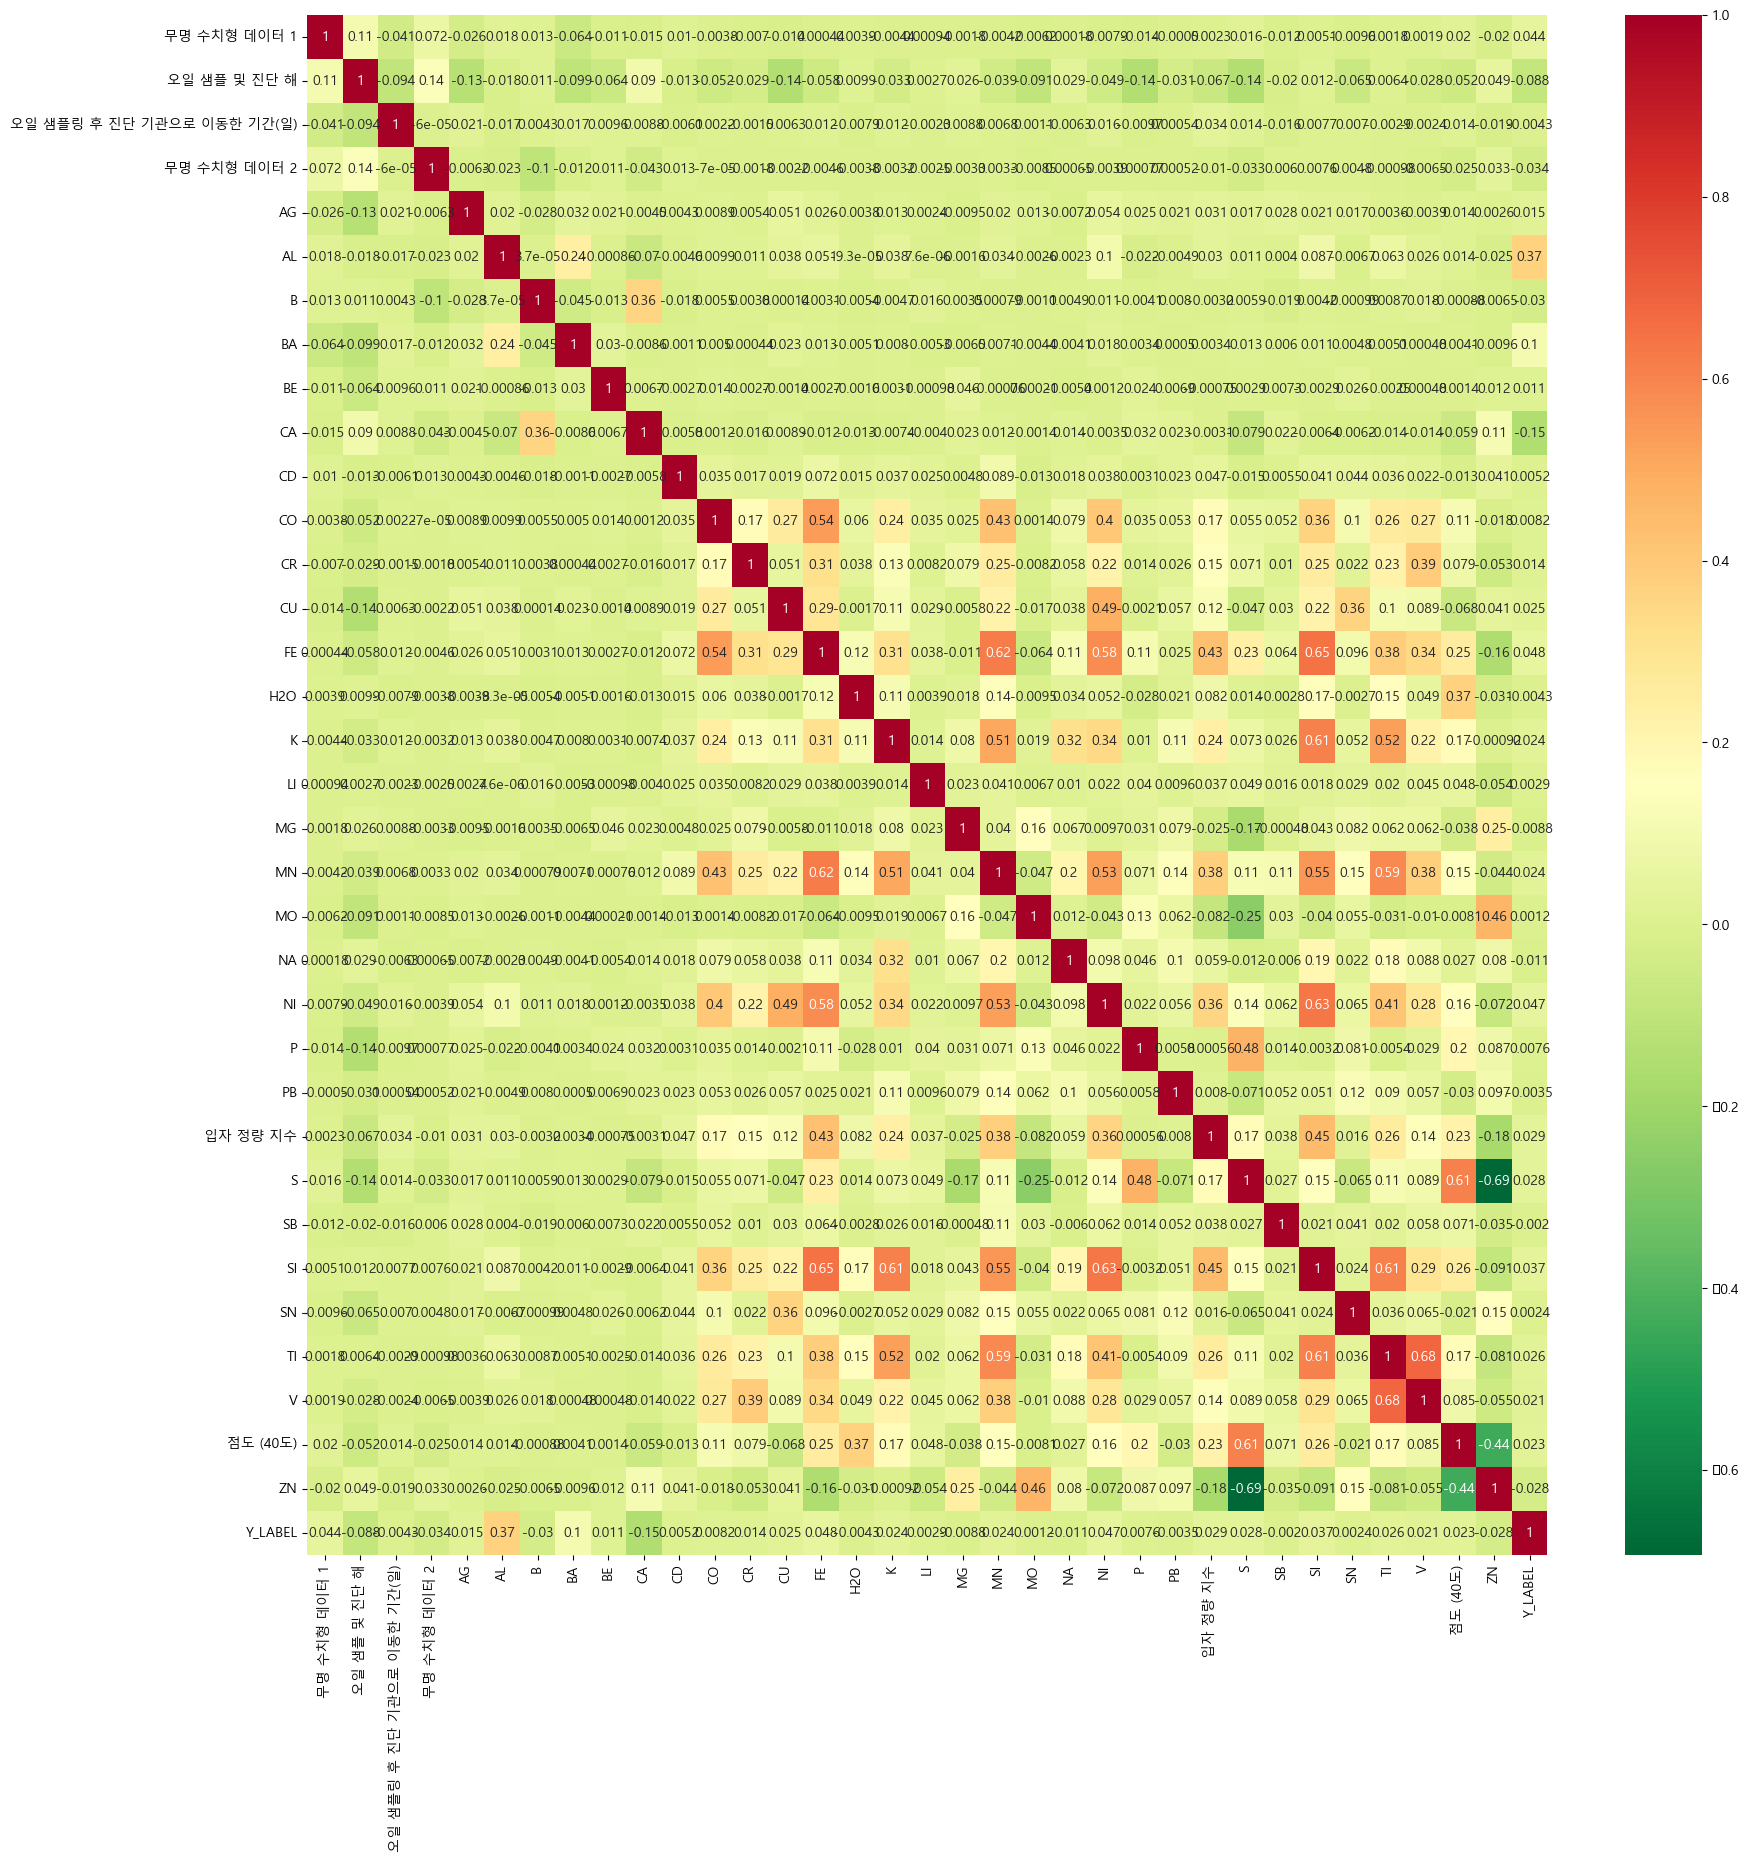

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn_r')
plt.show()

In [37]:
df.corr()['Y_LABEL']

무명 수치형 데이터 1                  0.044197
오일 샘플 및 진단 해                 -0.087871
오일 샘플링 후 진단 기관으로 이동한 기간(일)   -0.004315
무명 수치형 데이터 2                 -0.033641
AG                            0.014671
AL                            0.370512
B                            -0.029787
BA                            0.104840
BE                            0.010685
CA                           -0.150379
CD                            0.005241
CO                            0.008175
CR                            0.014233
CU                            0.024975
FE                            0.047992
H2O                          -0.004262
K                             0.023963
LI                            0.002921
MG                           -0.008807
MN                            0.024274
MO                            0.001206
NA                           -0.010820
NI                            0.046806
P                             0.007602
PB                           -0.003549
입자 정량 지수                 

In [ ]:
# 양의 상관관계 AL, BA
# 음의 상관관계 CA
